In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import permutations 
import scipy.stats as st
from pingouin import kruskal
sns.set_theme(rc={'figure.figsize':(16,4)})

In [43]:
prod_df = pd.read_csv('Production.xls - Sheet1.csv')

In [44]:
prod_df.head()

,Week,Date,Hour,Line no.,Operator,Actual weight (in g),VENDOR
0,3,24,9,2,O1,150,V2
1,3,24,9,2,O1,150.2,V2
2,3,24,9,2,O1,150.3,V2
3,3,24,9,2,O1,150.2,V2
4,3,24,9,2,O1,150.1,V2


In [45]:
prod_df.tail()

,Week,Date,Hour,Line no.,Operator,Actual weight (in g),VENDOR
665,1,4,15,1,O5,150.2,V3
666,1,4,15,1,O5,150.1,V3
667,1,4,15,1,O5,150.2,V3
668,1,4,15,1,O5,150.1,V3
669,1,4,15,1,O5,150.2,V3


In [46]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Week                   670 non-null    int64 
 1   Date                   670 non-null    int64 
 2   Hour                   670 non-null    int64 
 3   Line no.               670 non-null    int64 
 4   Operator               670 non-null    object
 5   Actual weight  (in g)  670 non-null    object
 6   VENDOR                 670 non-null    object
dtypes: int64(4), object(3)
memory usage: 36.8+ KB


In [47]:
prod_df['Actual weight  (in g)'].unique()

array(['150', '150.2', '150.3', '150.1', '149.9', '*', '150.5', '150.4',
       '150.35', '149.85', '150.05', '149.95', '150.25', '150.45',
       '149.8'], dtype=object)

In [48]:
prod_df.columns[prod_df.isin(['*']).any()]

Index(['Actual weight  (in g)'], dtype='object')

In [49]:
prod_df[prod_df['Actual weight  (in g)'] == '*']

,Week,Date,Hour,Line no.,Operator,Actual weight (in g),VENDOR
280,2,7,19,1,O1,*,V2


In [50]:
prod_df.drop(prod_df[prod_df['Actual weight  (in g)'] == '*'].index,inplace=True)

In [51]:
len(prod_df)

669

In [52]:
prod_df['Actual weight  (in g)'] = pd.to_numeric(prod_df['Actual weight  (in g)'])

In [53]:
prod_df.groupby('VENDOR').size()

VENDOR
V1     40
V2    509
V3    120
dtype: int64

In [54]:
vendor_median_weight = prod_df.groupby('VENDOR').agg({'Actual weight  (in g)':'median'}).reset_index()

In [55]:
vendor_median_weight['Actual weight  (in g)']

0    150.15
1    150.10
2    150.10
Name: Actual weight  (in g), dtype: float64

<Axes: xlabel='VENDOR', ylabel='Actual weight  (in g)'>

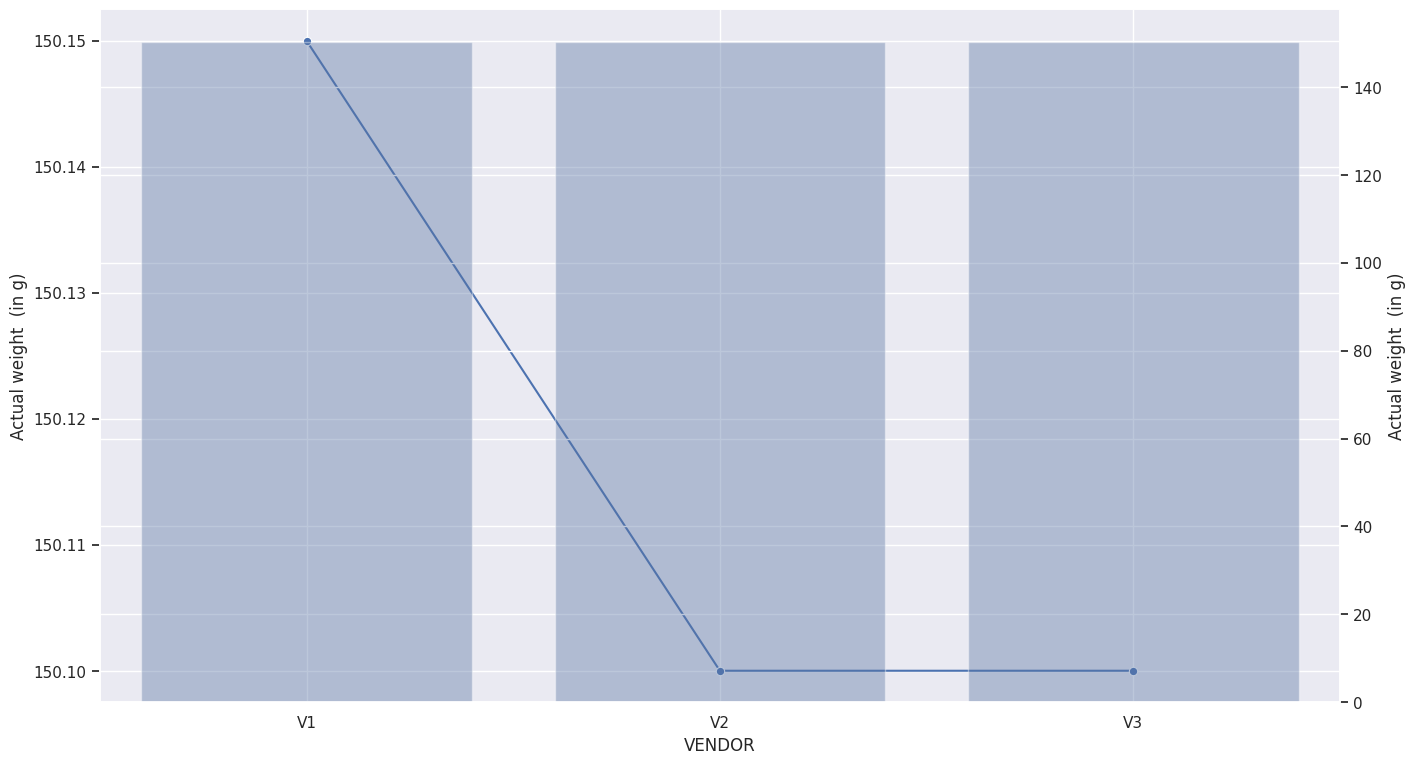

In [56]:
fig, axs1 = plt.subplots(figsize=(16,9))
sns.lineplot(x='VENDOR',y='Actual weight  (in g)',data=vendor_median_weight,marker='o',ax=axs1,sort=False)
axs2 = axs1.twinx()
sns.barplot(x='VENDOR',y='Actual weight  (in g)',data=vendor_median_weight,ax=axs2,alpha=0.4)

<Axes: xlabel='VENDOR', ylabel='Actual weight  (in g)'>

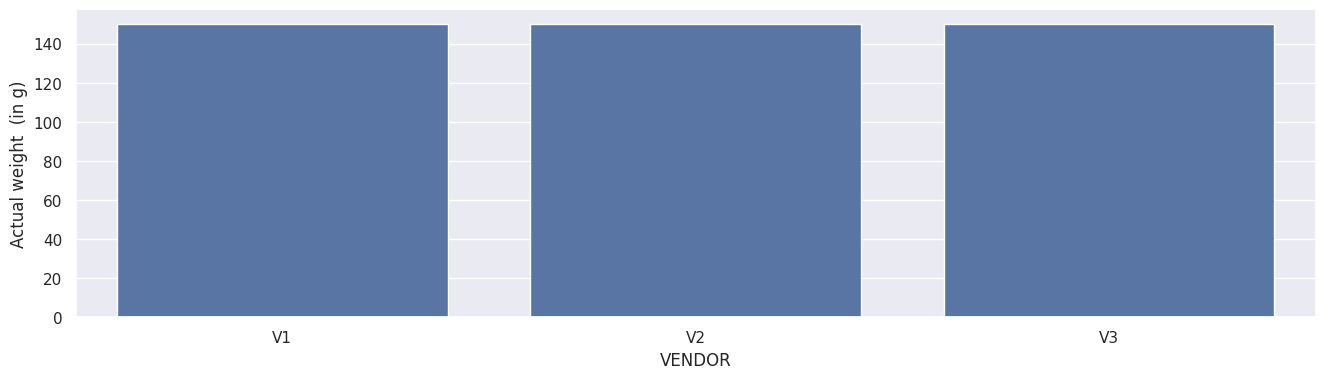

In [57]:
sns.barplot(x='VENDOR',y='Actual weight  (in g)',data=vendor_median_weight)

In [58]:
prod_df.groupby('Operator').size()

Operator
O1    429
O2     70
O3     80
O4     20
O5     70
dtype: int64

In [59]:
operator_median_weight = prod_df.groupby('Operator').agg({'Actual weight  (in g)':'median'}).reset_index()

In [60]:
operator_median_weight

,Operator,Actual weight (in g)
0,O1,150.2
1,O2,150.1
2,O3,150.2
3,O4,150.2
4,O5,150.1


<Axes: xlabel='Operator', ylabel='Actual weight  (in g)'>

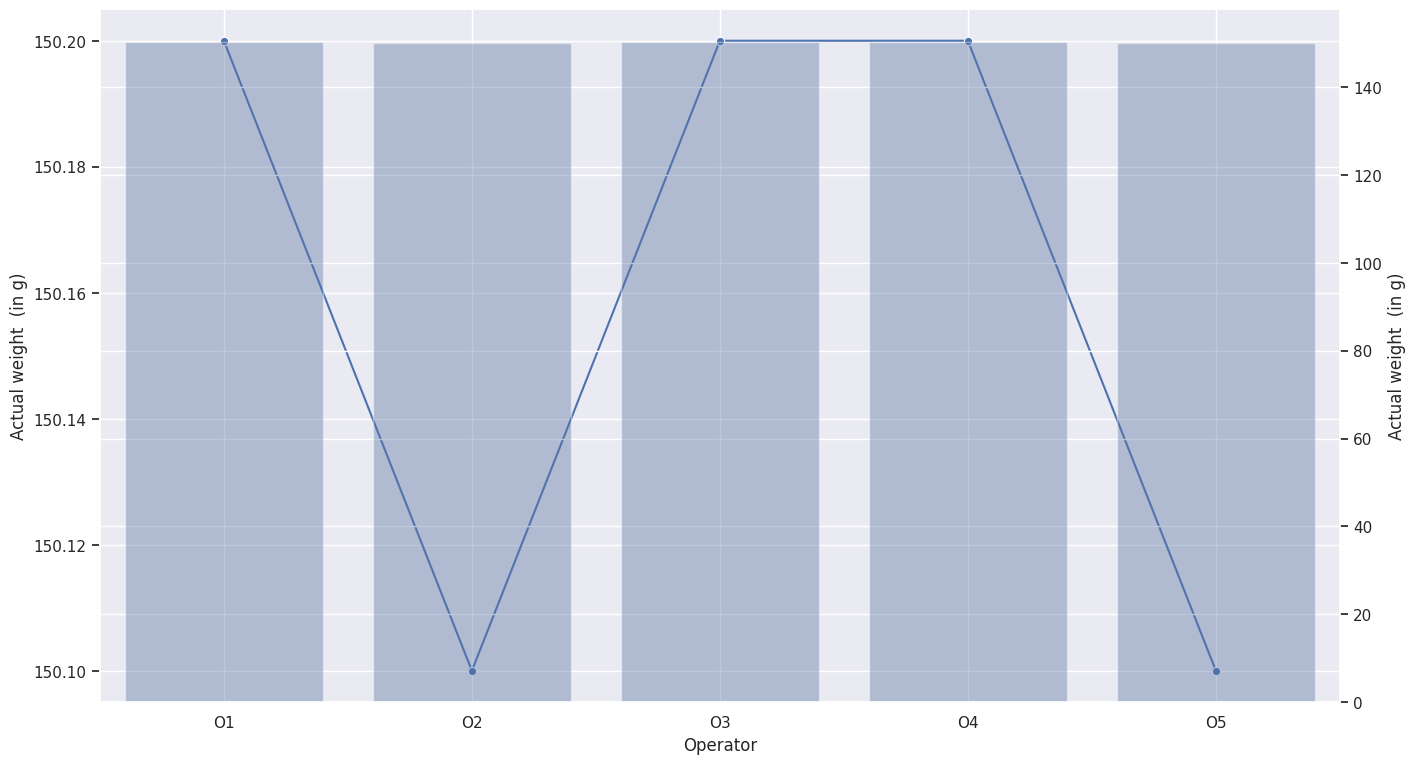

In [61]:
fig, axs1 = plt.subplots(figsize=(16,9))
sns.lineplot(x='Operator',y='Actual weight  (in g)',data=operator_median_weight,marker='o',ax=axs1,sort=False)
axs2 = axs1.twinx()
sns.barplot(x='Operator',y='Actual weight  (in g)',data=operator_median_weight,ax=axs2,alpha=0.4)

<Axes: >

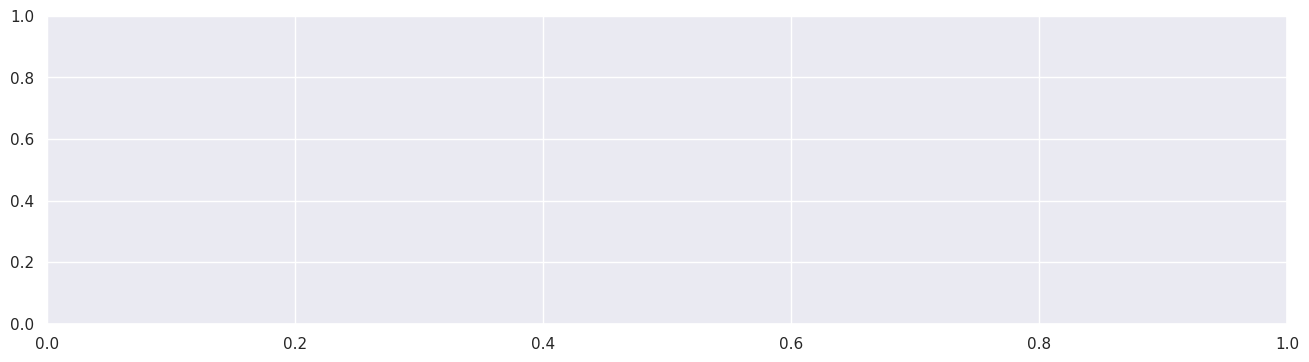

In [62]:
sns.barplot()

<Axes: xlabel='Actual weight  (in g)', ylabel='Count'>

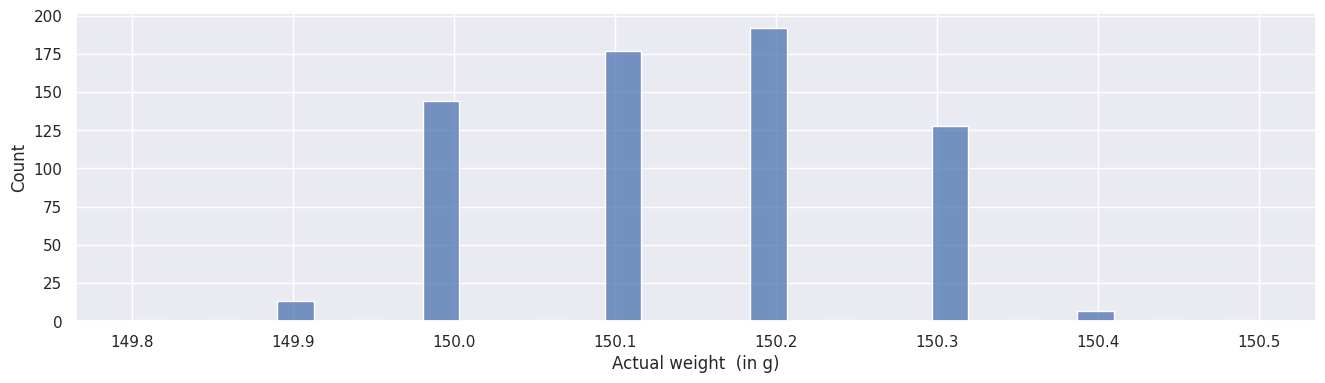

In [63]:
sns.histplot(prod_df['Actual weight  (in g)'])

The data isn't normal

In [64]:
prod_df.columns

Index(['Week', 'Date', 'Hour', 'Line no.', 'Operator', 'Actual weight  (in g)',
       'VENDOR'],
      dtype='object')

In [65]:
unique_elems = {k:prod_df[k].unique() for k in prod_df.columns }

In [66]:
unique_elems

{'Week': array([3, 2, 1]),
 'Date': array([24,  6,  7,  8, 11,  4]),
 'Hour': array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  1,  2,
         3,  4,  5,  6,  7,  8]),
 'Line no.': array([2, 1]),
 'Operator': array(['O1', 'O2', 'O3', 'O4', 'O5'], dtype=object),
 'Actual weight  (in g)': array([150.  , 150.2 , 150.3 , 150.1 , 149.9 , 150.5 , 150.4 , 150.35,
        149.85, 150.05, 149.95, 150.25, 150.45, 149.8 ]),
 'VENDOR': array(['V2', 'V3', 'V1'], dtype=object)}

In [67]:
len(unique_elems['Hour'])%3

2

In [68]:
len(unique_elems['Hour'])//3

7

In [69]:
len(unique_elems['Date'])%3

0

In [70]:
len(unique_elems['Date'])//3

2

```python
for i in unique_elems.keys():
    num_vals = len(unique_elems[i])
    if i == 'Actual weight  (in g)': continue
    if num_vals > 3: nrows,ncols = num_vals%3,num_vals//3
    else: nrows,ncols = 1,num_vals
    if nrows==0:nrows = 1
    fig , axs = plt.subplots(nrows,ncols,figsize=(35,8))
    for _,ii in enumerate(unique_elems[i]):
        tmp = prod_df[prod_df[i] == ii]['Actual weight  (in g)']
        if nrows==1: sns.histplot(ax=axs[_],data=tmp).set_xlabel(f'{i}-{ii}')
        if nrows>1: sns.histplot(ax=axs[_],data=tmp).set_xlabel(f'{i}-{ii}')
```

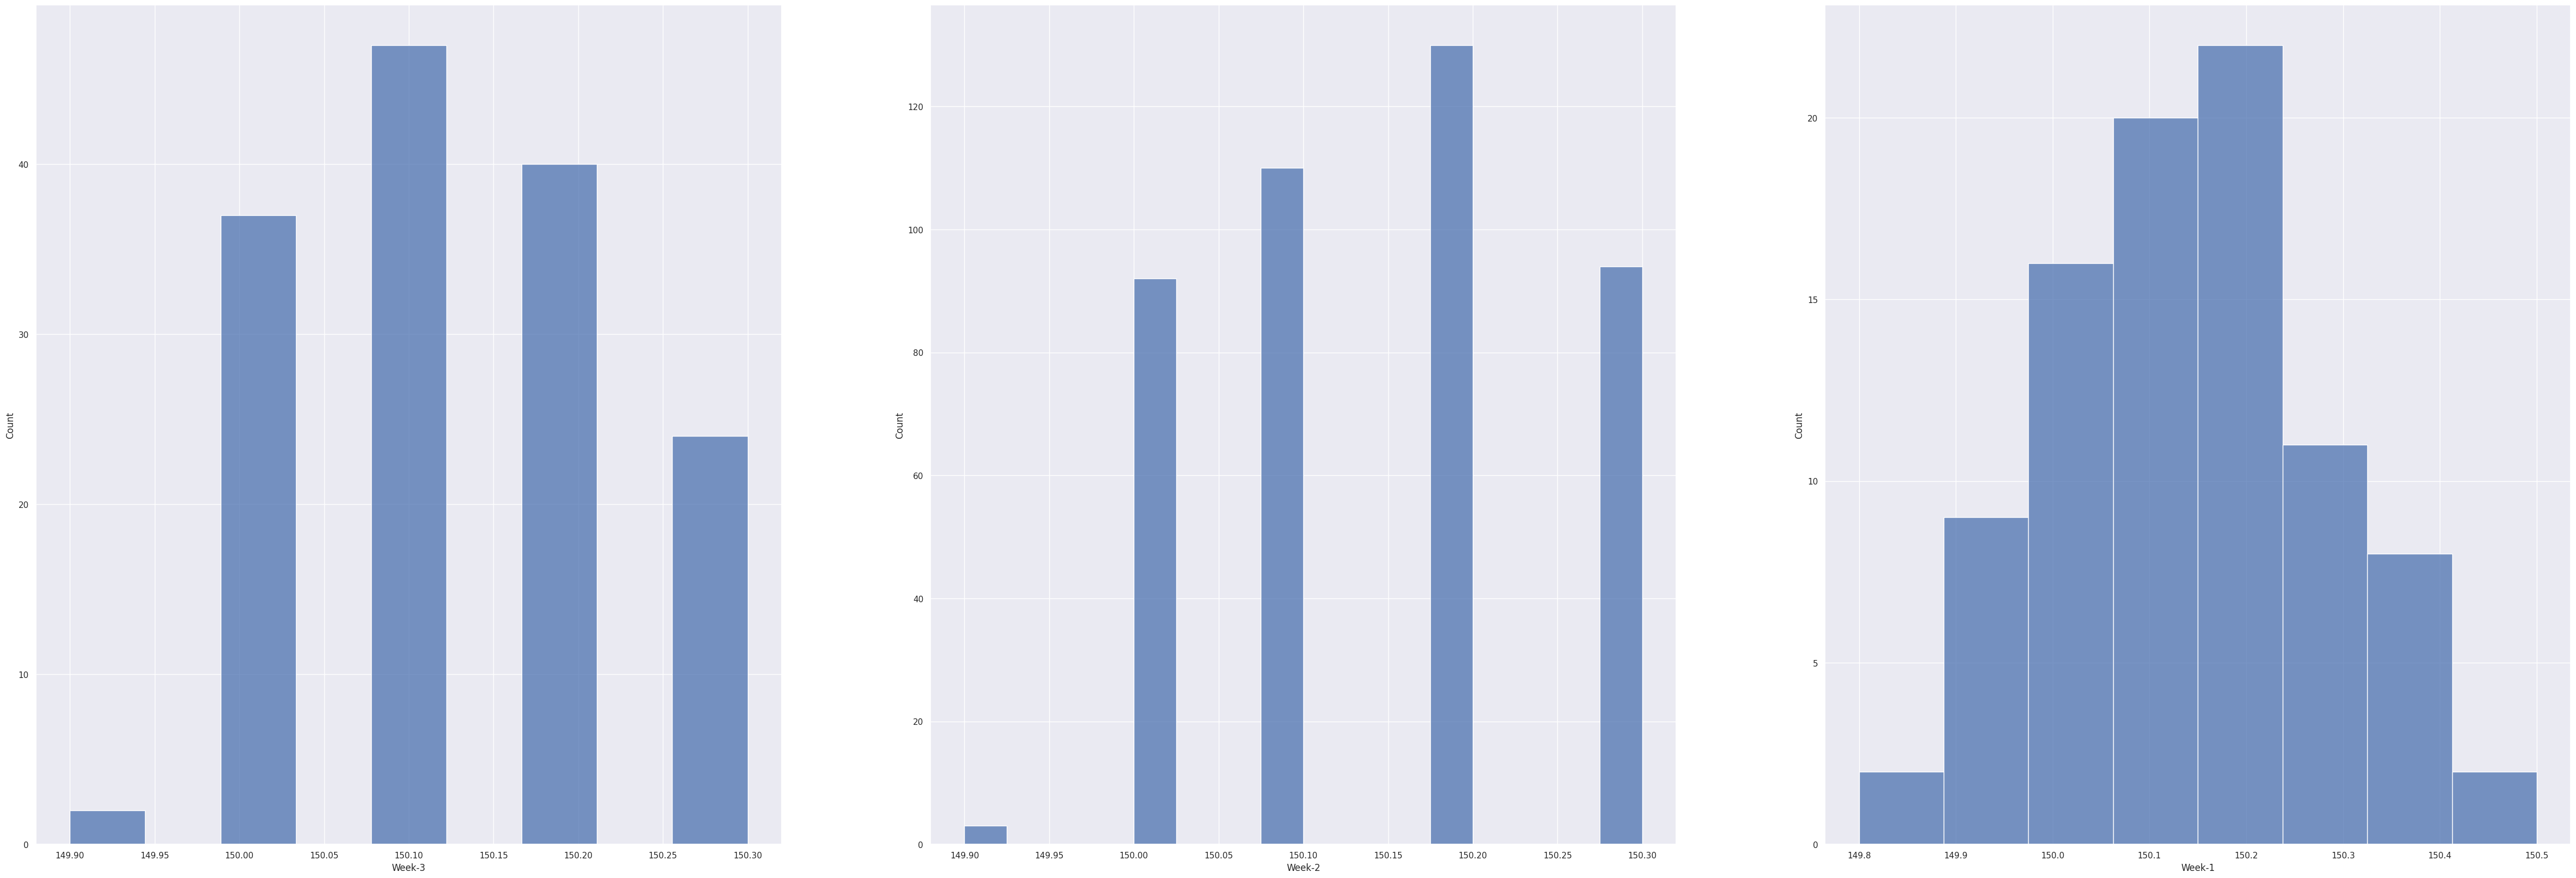

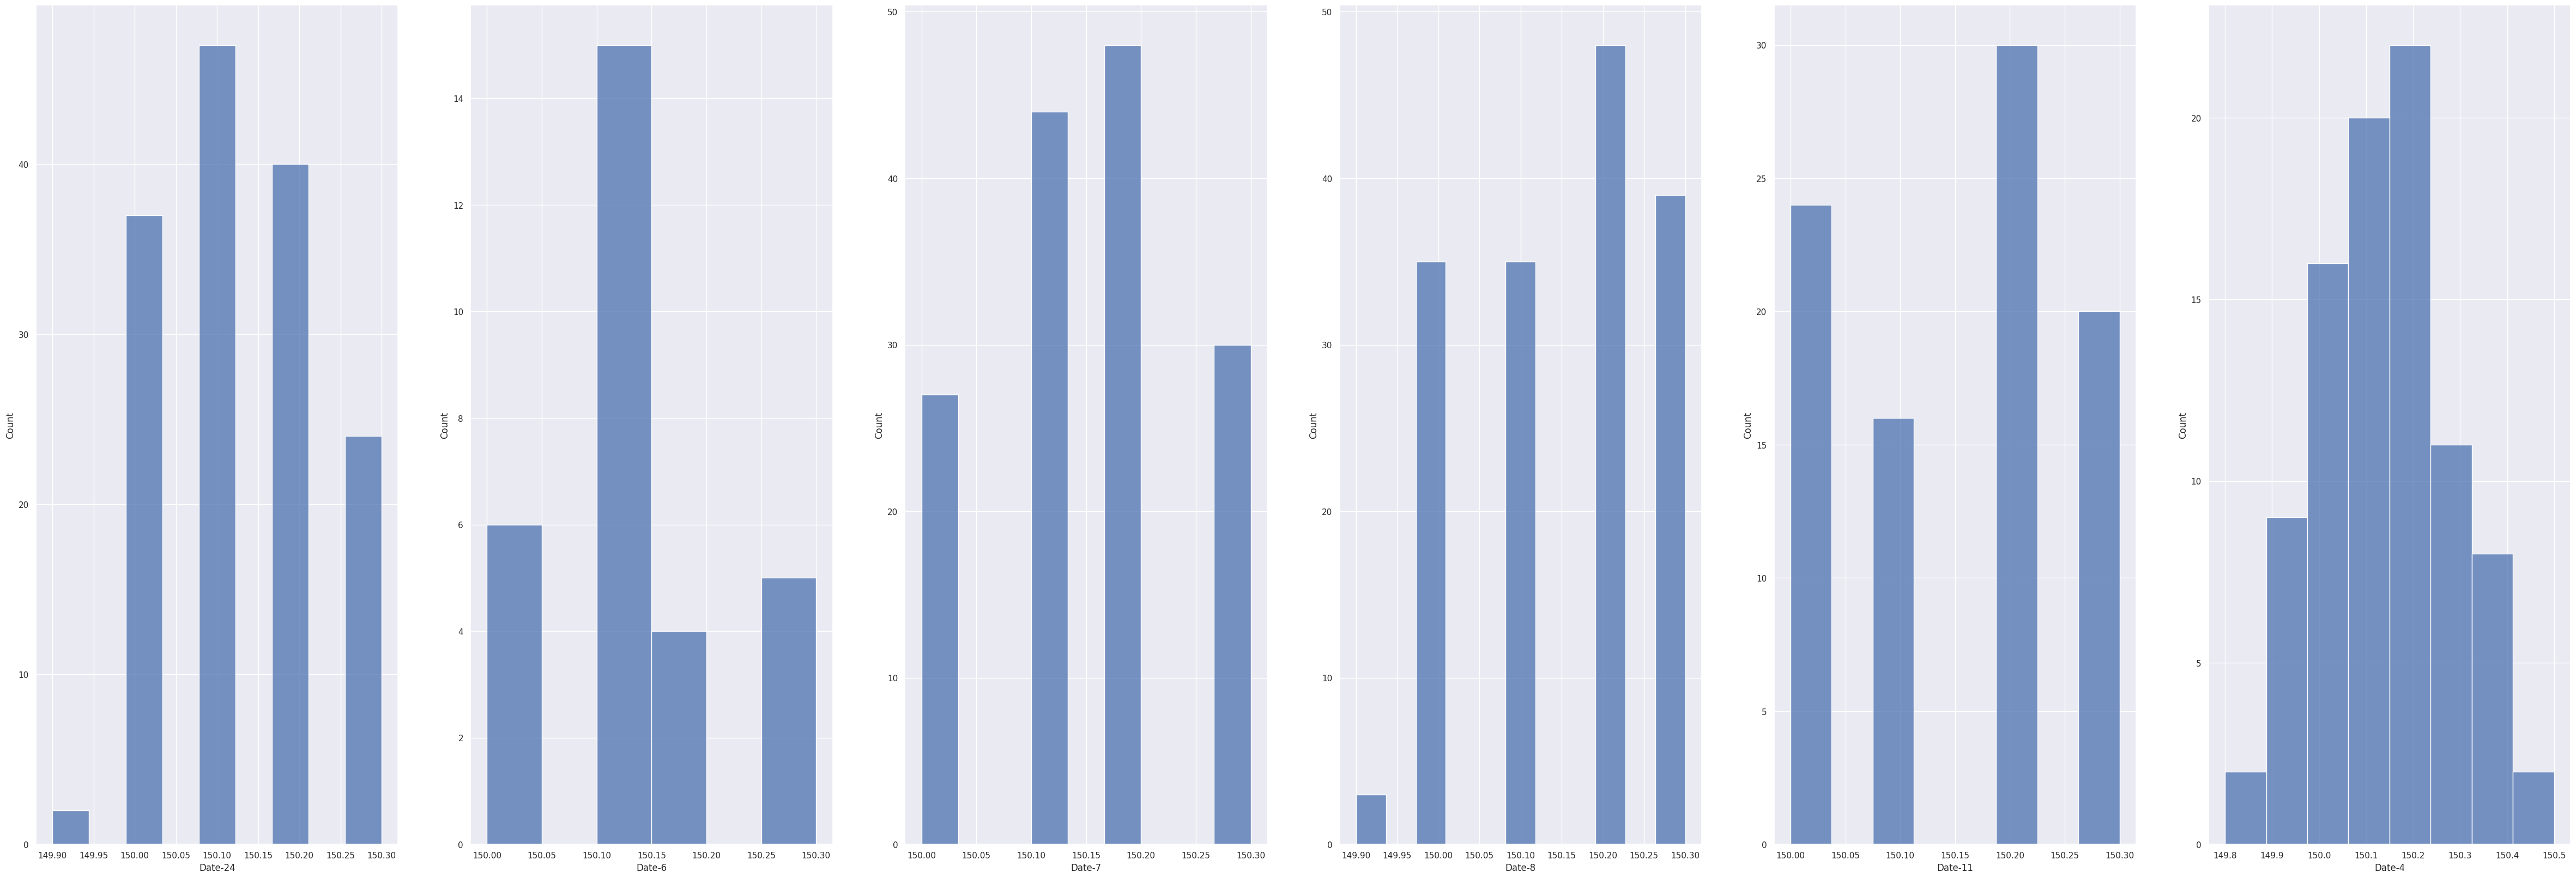

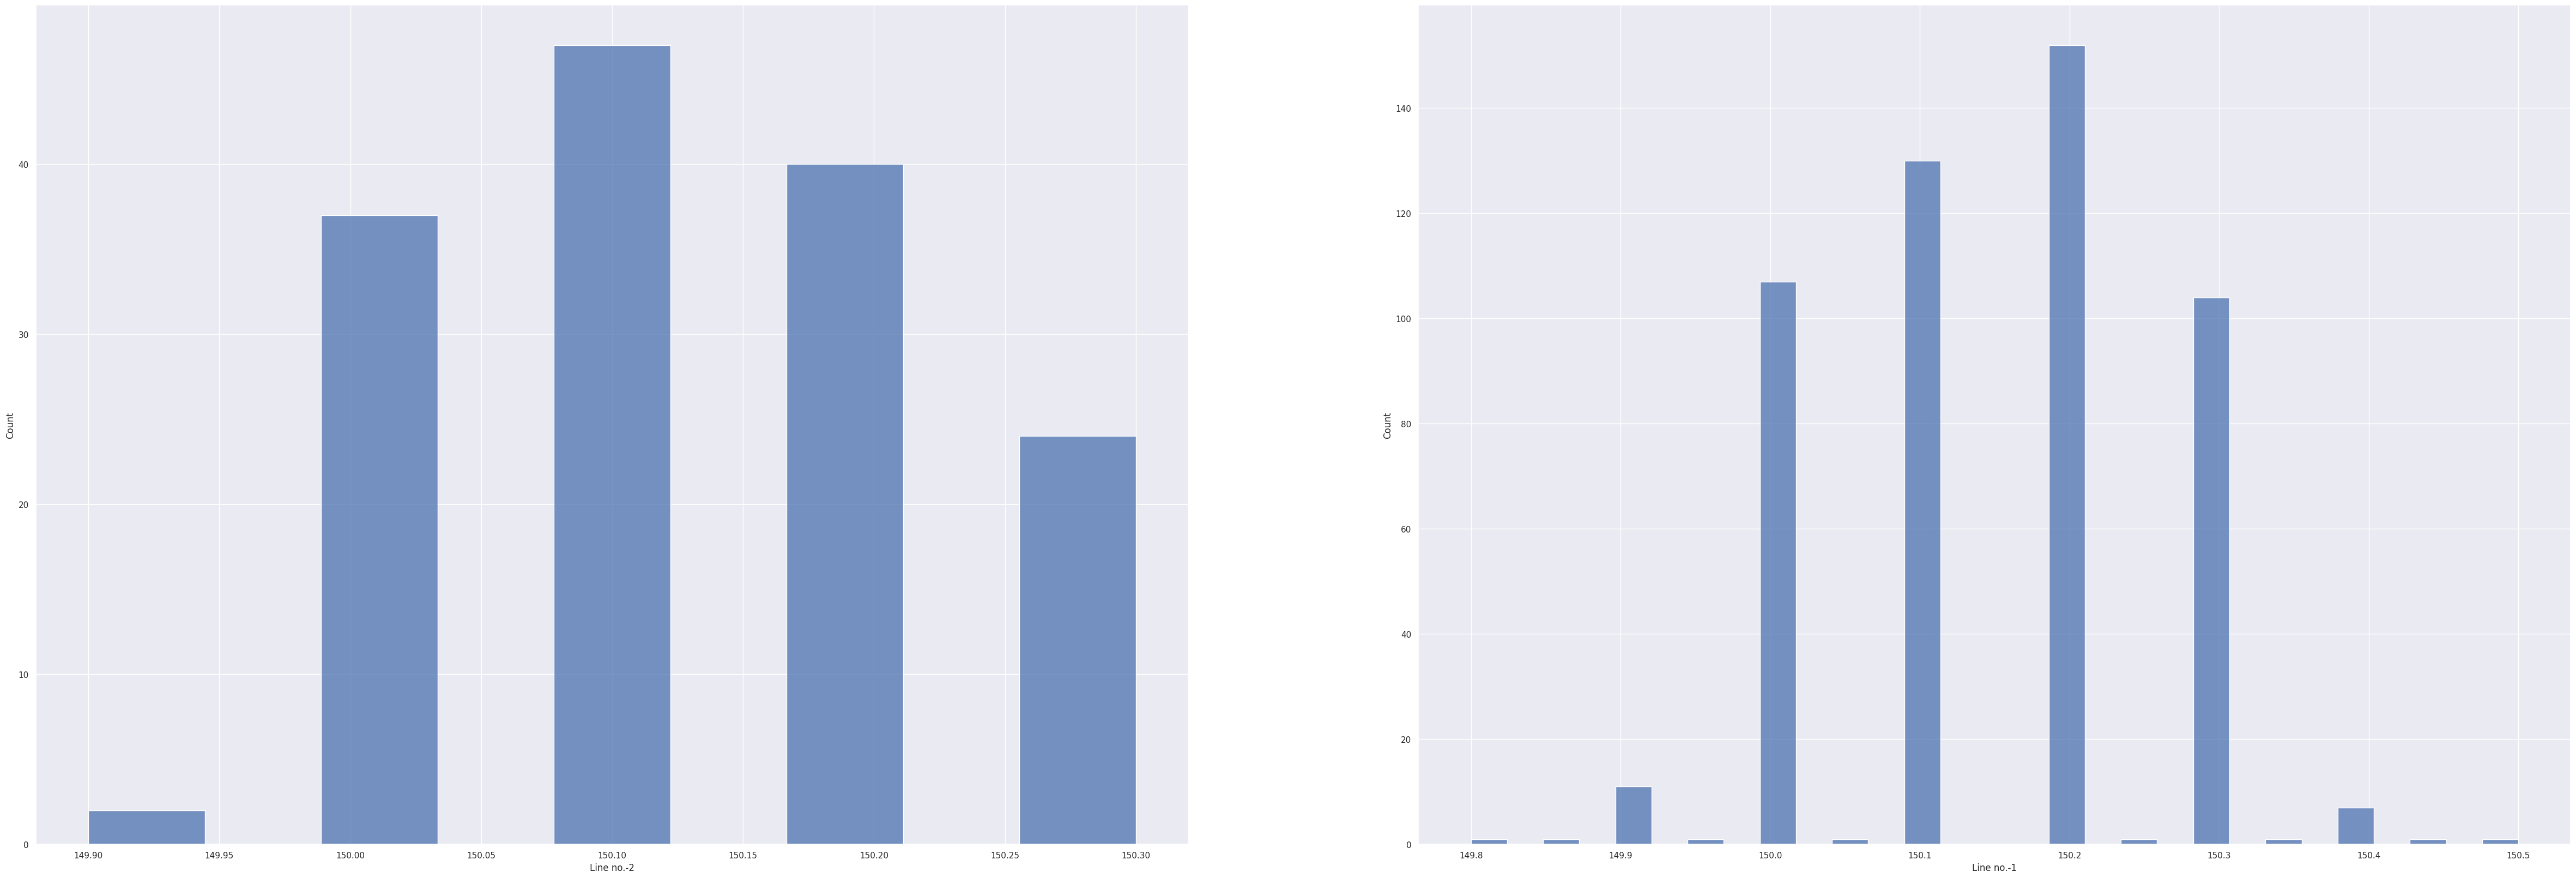

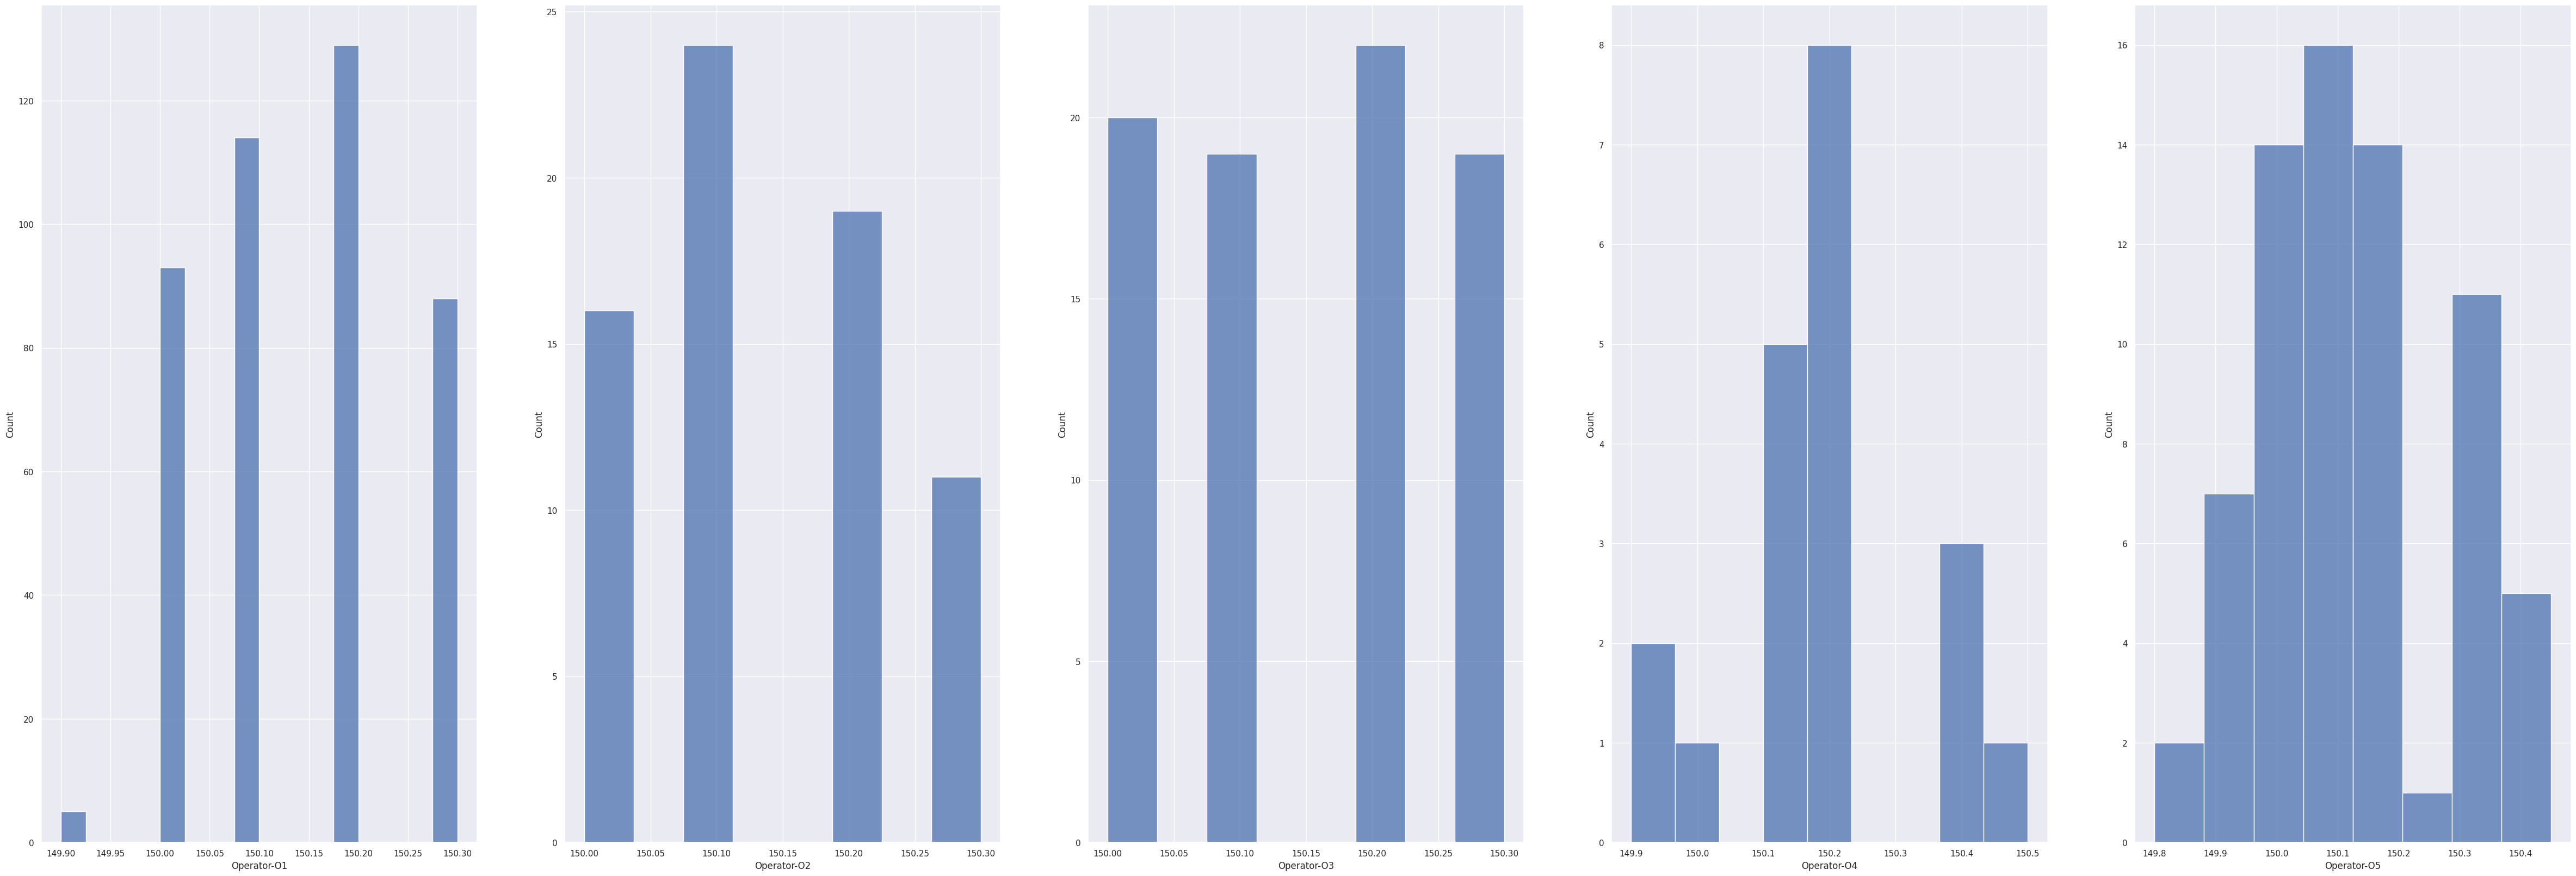

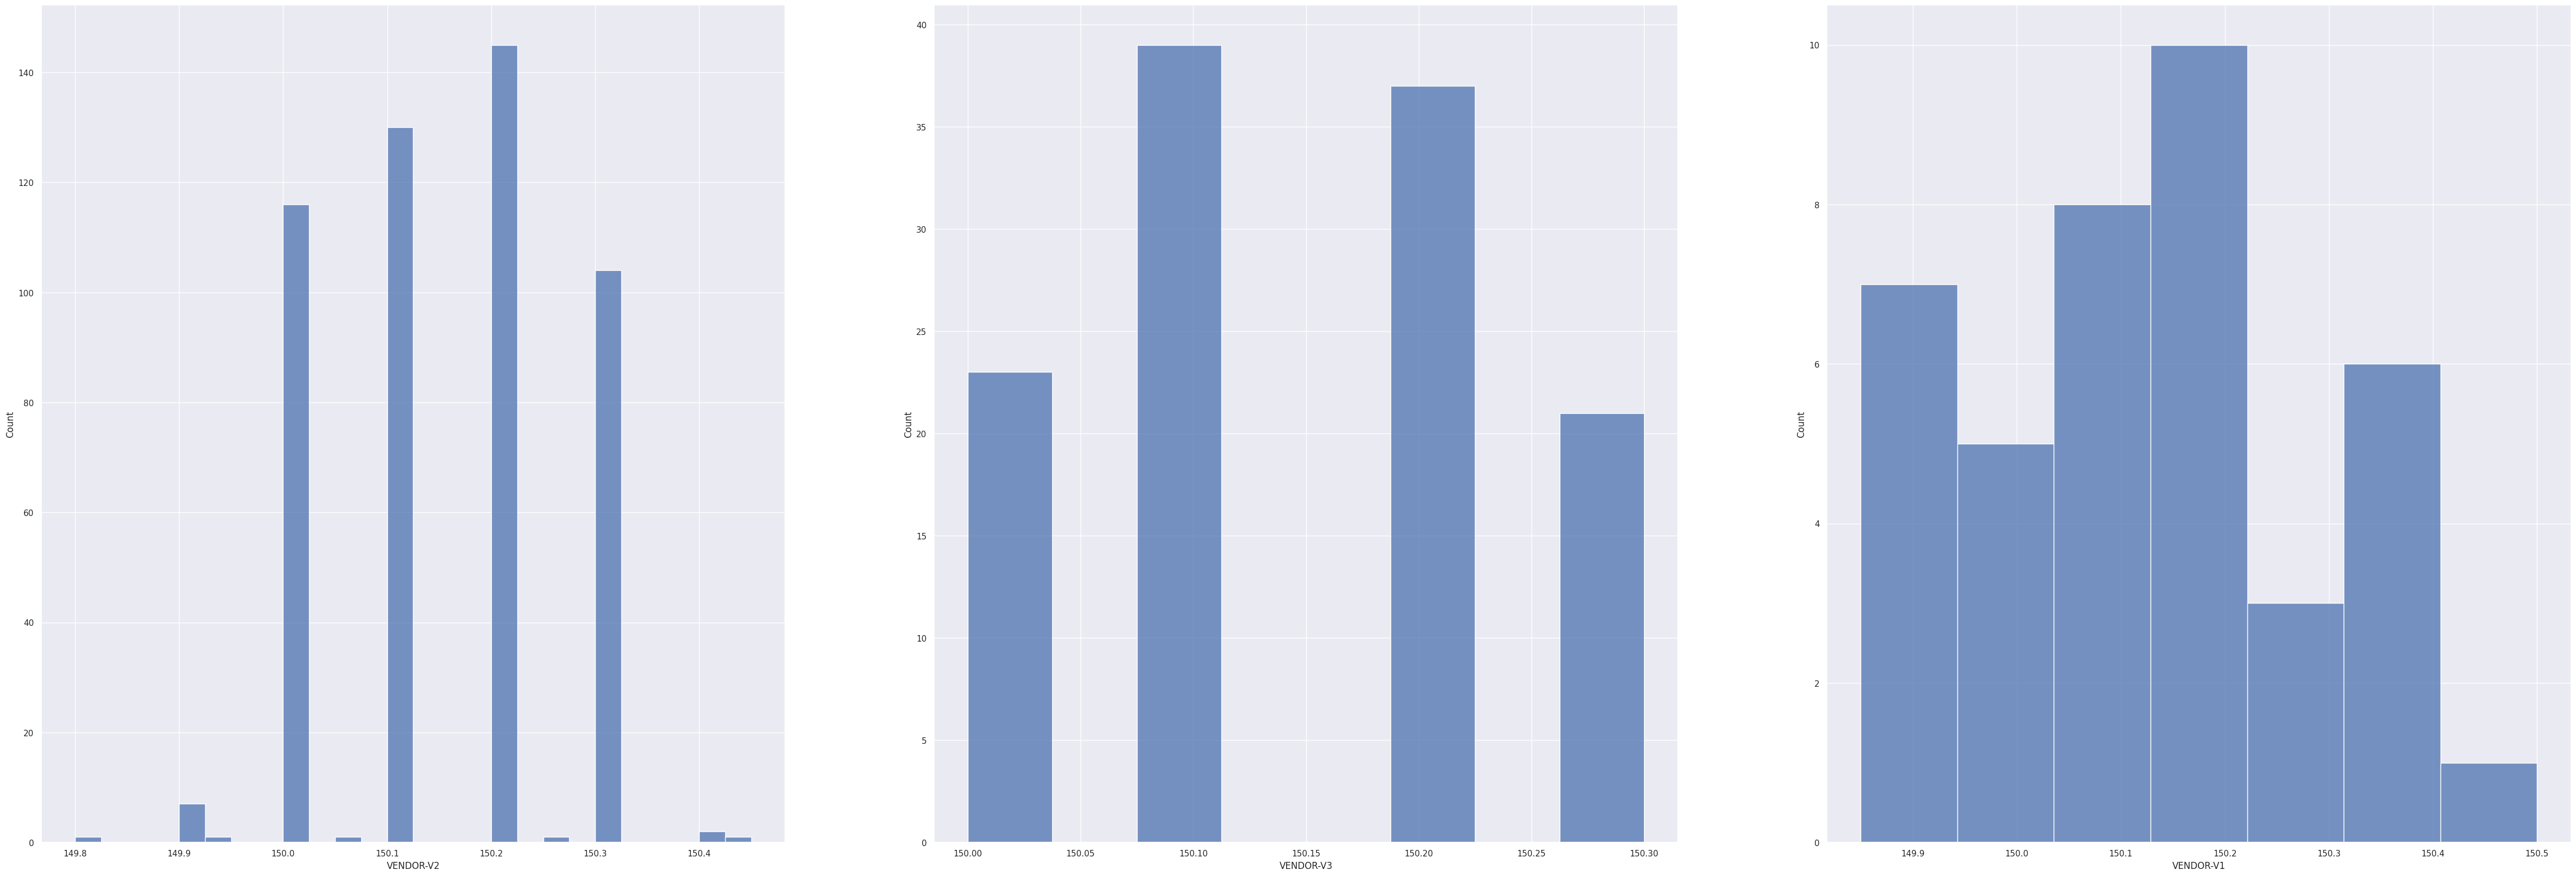

In [71]:
for i in unique_elems.keys():
    if i in ['Actual weight  (in g)', 'Hour']: continue
    fig , axs = plt.subplots(1,len(unique_elems[i]),figsize=(60,20))
    for _,ii in enumerate(unique_elems[i]):
        tmp = prod_df[prod_df[i] == ii]['Actual weight  (in g)']
        sns.histplot(ax=axs[_],data=tmp).set_xlabel(f'{i}-{ii}')

```python
[i,ii in zip(unique_elems['Hour'],[i for i in range(0,5)])]
```

In [72]:
unique_elems['Hour']

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  1,  2,
        3,  4,  5,  6,  7,  8])

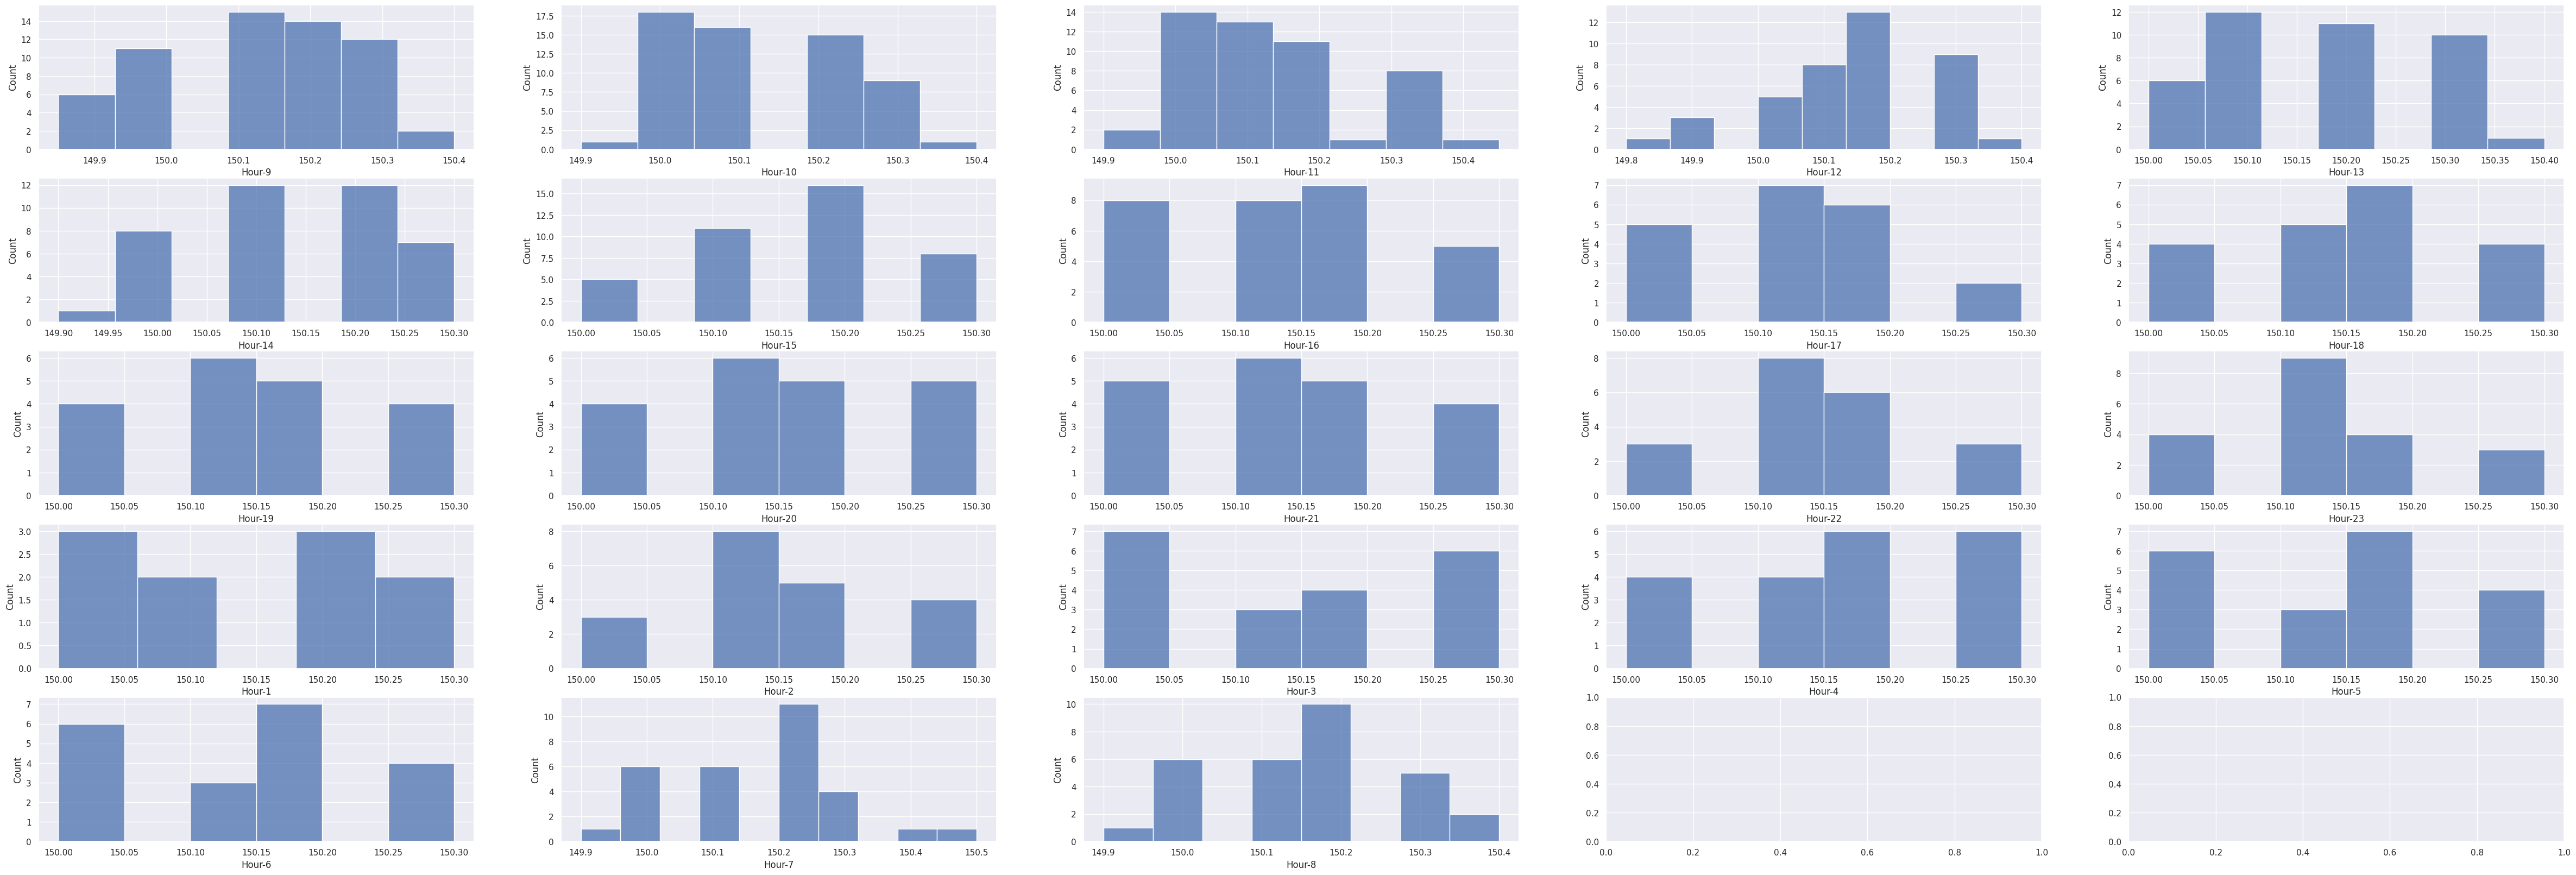

In [73]:
fig , axs = plt.subplots(5,5,figsize=(60,20))
row,col = 0,0
for ii in unique_elems['Hour']:
    tmp = prod_df[prod_df['Hour'] == ii]['Actual weight  (in g)']
    if col == 5: row, col = row+1,0
    sns.histplot(ax=axs[row,col],data=tmp).set_xlabel(f'Hour-{ii}')
    col += 1

In [74]:
prod_df.head()

,Week,Date,Hour,Line no.,Operator,Actual weight (in g),VENDOR
0,3,24,9,2,O1,150.0,V2
1,3,24,9,2,O1,150.2,V2
2,3,24,9,2,O1,150.3,V2
3,3,24,9,2,O1,150.2,V2
4,3,24,9,2,O1,150.1,V2


In [75]:
unique_elems

{'Week': array([3, 2, 1]),
 'Date': array([24,  6,  7,  8, 11,  4]),
 'Hour': array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  1,  2,
         3,  4,  5,  6,  7,  8]),
 'Line no.': array([2, 1]),
 'Operator': array(['O1', 'O2', 'O3', 'O4', 'O5'], dtype=object),
 'Actual weight  (in g)': array([150.  , 150.2 , 150.3 , 150.1 , 149.9 , 150.5 , 150.4 , 150.35,
        149.85, 150.05, 149.95, 150.25, 150.45, 149.8 ]),
 'VENDOR': array(['V2', 'V3', 'V1'], dtype=object)}

In [76]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669 entries, 0 to 669
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Week                   669 non-null    int64  
 1   Date                   669 non-null    int64  
 2   Hour                   669 non-null    int64  
 3   Line no.               669 non-null    int64  
 4   Operator               669 non-null    object 
 5   Actual weight  (in g)  669 non-null    float64
 6   VENDOR                 669 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 41.8+ KB


In [77]:
prod_df['VENDOR'] = np.where(prod_df['VENDOR'] == 'V1',1,np.where(prod_df['VENDOR'] == 'V2',2,3))

In [78]:
prod_df['Operator'] = np.where(prod_df['Operator'] == 'O1',1,np.where(prod_df['VENDOR'] == 'O2',2,np.where(prod_df['Operator']=='O3',3,np.where(prod_df['VENDOR']=='O4',4,5))))

In [79]:
kruskal(data=prod_df,dv='Actual weight  (in g)',between='Operator')

,Source,ddof1,H,p-unc
Kruskal,Operator,2,1.068174,0.586204


In [80]:
kruskal(data=prod_df,dv='Actual weight  (in g)',between='Line no.')

,Source,ddof1,H,p-unc
Kruskal,Line no.,1,3.056507,0.080414


In [81]:
def res_check(bw_var, p_val, los=0.05):
    if p_val < los:
        print(f'The p-value of {round(p_val,6)} is less than the level of significance of {int(los*100)}%, therefore we can reject the null hypothesis.  Hence the median value for actual weight in gms do differ significantly for atleast 1 level of {bw_var}\n')
    else:
        print(f'The p-value of {round(p_val,6)} is greater than or equal to the level of significance of {int(los*100)}%, therefore we do not reject the null hypothesis.Hence the median value for actual weight in gms do not differ significantly for all levels of {bw_var}\n')

In [82]:
prod_df.columns

Index(['Week', 'Date', 'Hour', 'Line no.', 'Operator', 'Actual weight  (in g)',
       'VENDOR'],
      dtype='object')

In [83]:
list(prod_df.columns).pop(list(prod_df.columns).index('Actual weight  (in g)'))

'Actual weight  (in g)'

In [84]:
res

NameError: name 'res' is not defined

In [ ]:
res['H']

In [85]:
for i in [i for i in prod_df.columns if i != 'Actual weight  (in g)']:
    res = kruskal(data=prod_df,dv='Actual weight  (in g)',between=i)
    res_check(i,res['p-unc'].iloc[0])

The p-value of 0.14158 is greater than or equal to the level of significance of 5%, therefore we do not reject the null hypothesis.Hence the median value for actual weight in gms do not differ significantly for all levels of Week

The p-value of 0.321809 is greater than or equal to the level of significance of 5%, therefore we do not reject the null hypothesis.Hence the median value for actual weight in gms do not differ significantly for all levels of Date

The p-value of 0.982731 is greater than or equal to the level of significance of 5%, therefore we do not reject the null hypothesis.Hence the median value for actual weight in gms do not differ significantly for all levels of Hour

The p-value of 0.080414 is greater than or equal to the level of significance of 5%, therefore we do not reject the null hypothesis.Hence the median value for actual weight in gms do not differ significantly for all levels of Line no.

The p-value of 0.586204 is greater than or equal to the level of sign

In [99]:
unique_elems = {k:prod_df[k].unique() for k in prod_df.columns }

In [104]:
med_diffs = {}
for i in unique_elems.keys():
    if i in ['Actual weight  (in g)']: continue
    med_data = []
    for _,ii in enumerate(unique_elems[i]):
        tmp = prod_df[prod_df[i] == ii]['Actual weight  (in g)']
        print(f'The median for {i}-{ii} is {np.median(tmp)}')
        med_data.append(np.median(tmp))
    med_diff = [abs(i[1]-i[0]) for i in permutations(med_data,2)]
    avg_med_diff = round(sum(med_diff)/len(med_diff),6)
    med_diffs[i] = avg_med_diff
    print(f'The median values of all levels of {i} on average differ by {avg_med_diff}')
    print('\n')

The median for Week-3 is 150.1
The median for Week-2 is 150.2
The median for Week-1 is 150.1
The median values of all levels of Week on average differ by 0.066667


The median for Date-24 is 150.1
The median for Date-6 is 150.1
The median for Date-7 is 150.2
The median for Date-8 is 150.2
The median for Date-11 is 150.2
The median for Date-4 is 150.1
The median values of all levels of Date on average differ by 0.06


The median for Hour-9 is 150.1
The median for Hour-10 is 150.1
The median for Hour-11 is 150.1
The median for Hour-12 is 150.2
The median for Hour-13 is 150.2
The median for Hour-14 is 150.1
The median for Hour-15 is 150.2
The median for Hour-16 is 150.1
The median for Hour-17 is 150.1
The median for Hour-18 is 150.2
The median for Hour-19 is 150.1
The median for Hour-20 is 150.14999999999998
The median for Hour-21 is 150.1
The median for Hour-22 is 150.1
The median for Hour-23 is 150.1
The median for Hour-1 is 150.14999999999998
The median for Hour-2 is 150.1
The median f

In [105]:
med_diffs

{'Week': 0.066667,
 'Date': 0.06,
 'Hour': 0.050988,
 'Line no.': 0.1,
 'Operator': 0.066667,
 'VENDOR': 0.033333}

[Text(0.5, 1.0, 'Average difference between the medians of all levels in the variables')]

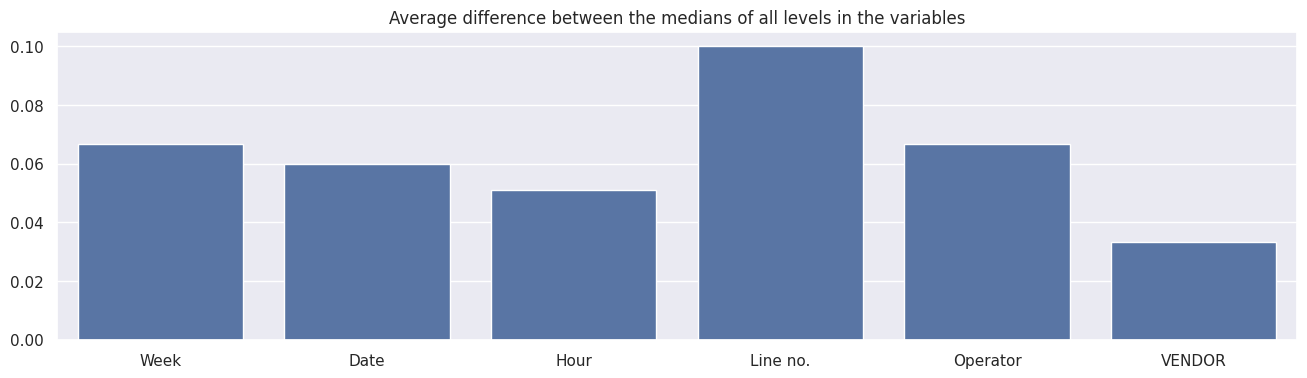

In [114]:
k = list(med_diffs.keys())
vals = [med_diffs[i] for i in k]
sns.barplot(x=k,y=vals).set(title='Average difference between the medians of all levels in the variables')

#### We can see that the median across different levels for different variables don't differ significantly